Sentiment Analysis on tweets


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('mental_health.csv')

In [ ]:
df.head()

,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0
3,im done trying feel betterthe reason im still ...,1
4,worried year old girl subject domestic physic...,1


In [ ]:
df.shape

(27977, 2)

In [ ]:
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
df.duplicated().sum()

5

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27972 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27972 non-null  object
 1   label   27972 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 655.6+ KB


In [ ]:
df['label'].unique()

array([0, 1])

In [ ]:
df['label'].value_counts()

0    14134
1    13838
Name: label, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

##Univariate Analysis of Label column

As we have only 1 column, so here we are doing Univariate Analysis

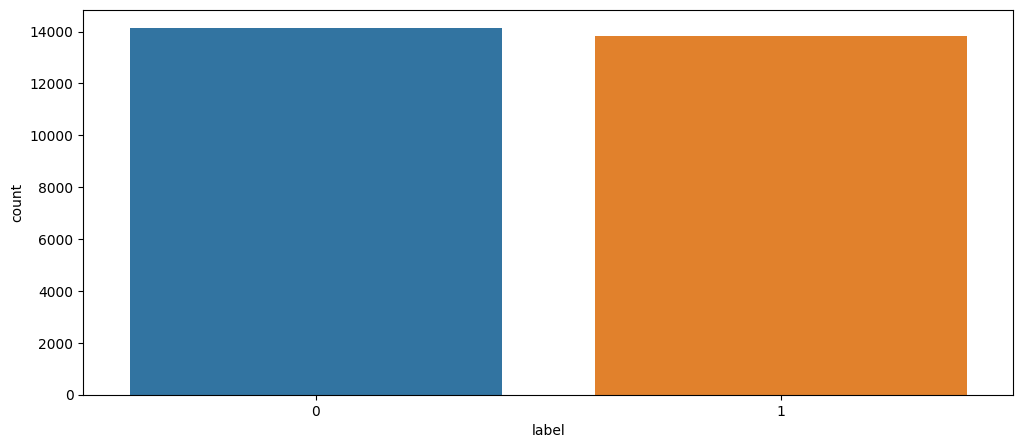

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='label', data=df)
plt.show()

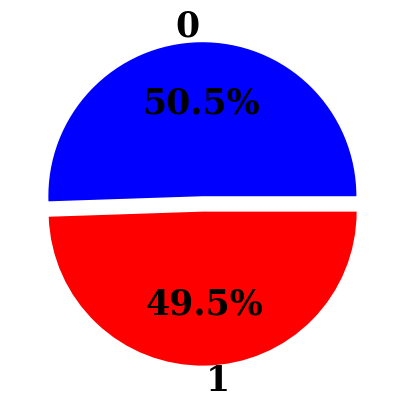

In [ ]:
label_data = df['label'].value_counts()

explode = (0.05, 0.05)
plt.figure(figsize=(7, 5))
plt.pie(label_data,
                               labels = label_data.index,
                               colors = ['blue', 'red'],
                               shadow = False,
                               startangle = 0,
                               explode = explode,
                               autopct = '%1.1f%%',
                               textprops={ 'fontsize': 25,
                                           'color': 'black',
                                           'weight': 'bold',
                                           'family': 'serif' })
plt.show()

# Text Preprocessing

In [ ]:
df['Total Words'] = df['text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

df['Total Chars'] = df["text"].apply(count_total_words)

In [ ]:
df

,text,label,Total Words,Total Chars
0,dear american teens question dutch person hear...,0,23,112
1,nothing look forward lifei dont many reasons k...,1,20,98
2,music recommendations im looking expand playli...,0,64,387
3,im done trying feel betterthe reason im still ...,1,100,493
4,worried year old girl subject domestic physic...,1,311,1819
...,...,...,...,...
27972,posting everyday people stop caring religion ...,0,28,172
27973,okay definetly need hear guys opinion ive pret...,0,163,812
27974,cant get dog think ill kill myselfthe last thi...,1,33,157
27975,whats point princess bridei really think like ...,1,96,507


##Univariate Analysis of Continuous data

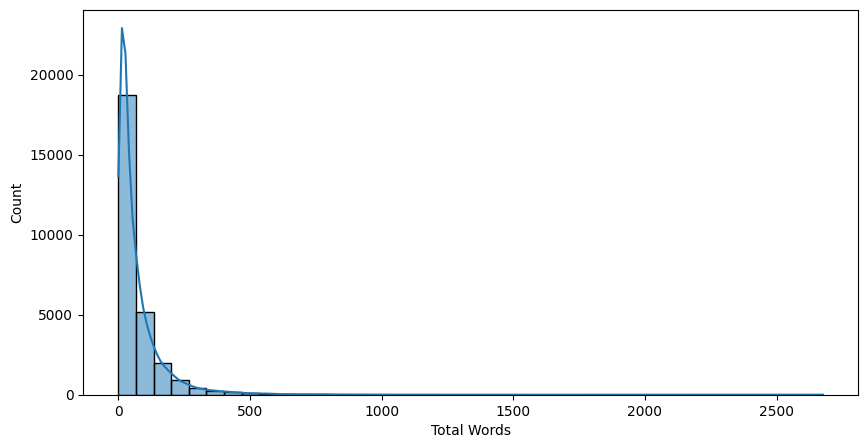

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Total Words'], bins = 40, kde = True, palette = 'hls')
plt.show()

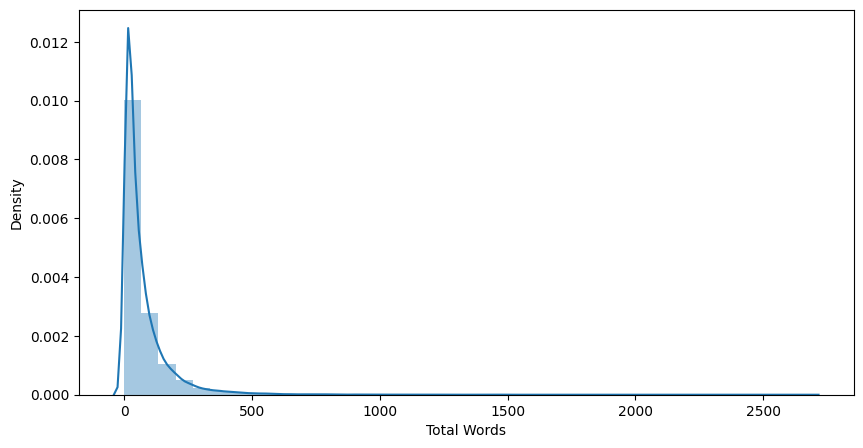

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['Total Words'], bins = 40, kde = True)
plt.show()

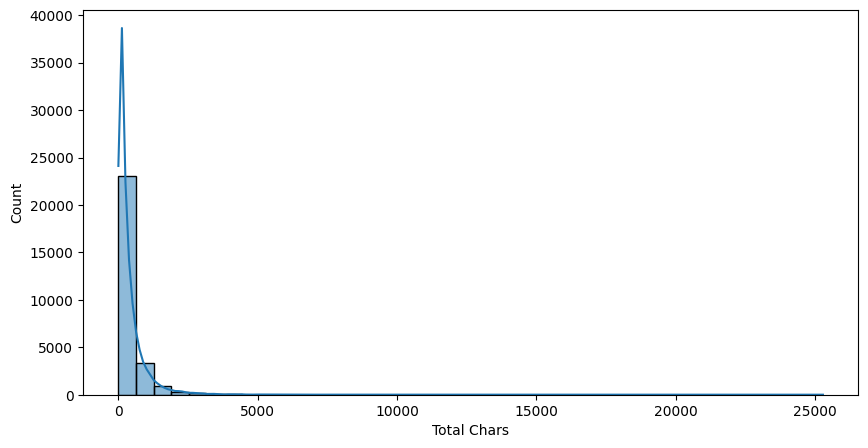

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['Total Chars'], bins = 40, kde = True, palette = 'hls')
plt.show()

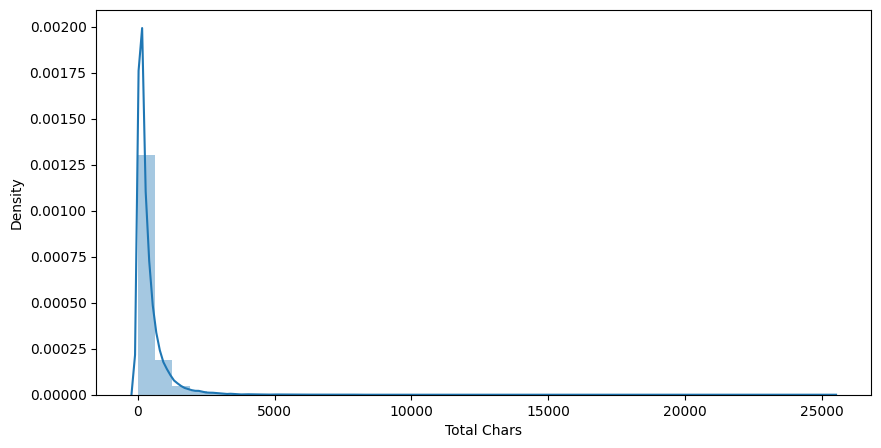

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['Total Chars'], bins = 40, kde = True)
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import re #finds patterns in data

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
def preprocess_text(text):
    # remove URLs
    text = re.sub(r'http\S+', '', text)

    # convert text to lowercase
    text = text.lower()

    # remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    # tokenize text into words
    words = word_tokenize(text)

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # stem words
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    # lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # join words back into text
    text = ' '.join(words)

    # tokenize text into sentences
    sentences = sent_tokenize(text)

    return " ".join(sentences)

In [ ]:
df['text'] = df['text'].apply(preprocess_text)

In [ ]:
df

,text,label,Total Words,Total Chars
0,dear american teen question dutch person heard...,0,23,112
1,noth look forward lifei dont mani reason keep ...,1,20,98
2,music recommend im look expand playlist usual ...,0,64,387
3,im done tri feel betterth reason im still aliv...,1,100,493
4,worri year old girl subject domest physicalmen...,1,311,1819
...,...,...,...,...
27972,post everyday peopl stop care religion matter ...,0,28,172
27973,okay definetli need hear guy opinion ive prett...,0,163,812
27974,cant get dog think ill kill myselfth last thin...,1,33,157
27975,what point princess bridei realli think like w...,1,96,507


In [ ]:
from wordcloud import WordCloud, STOPWORDS #wordcloud showing frequency

In [ ]:
def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    wordcloud = WordCloud( scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(12,12))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

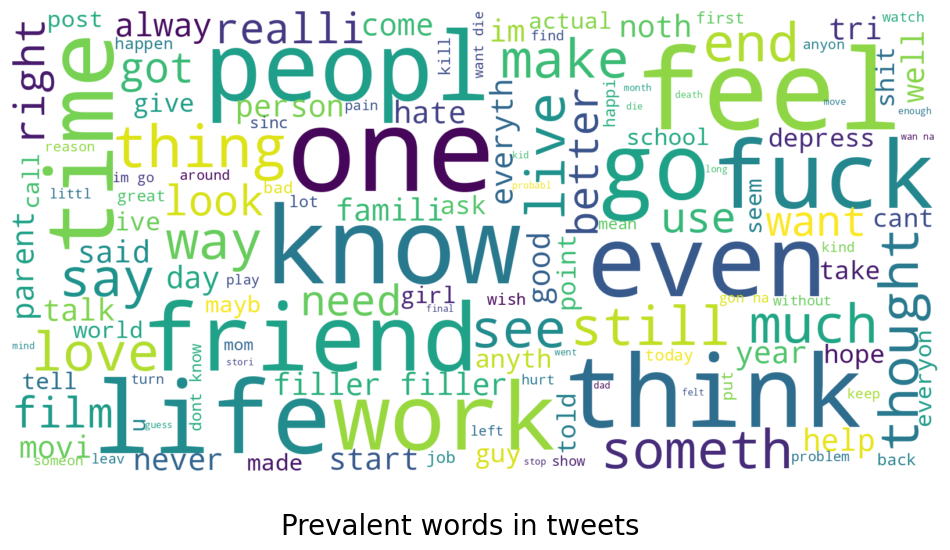

In [ ]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets')

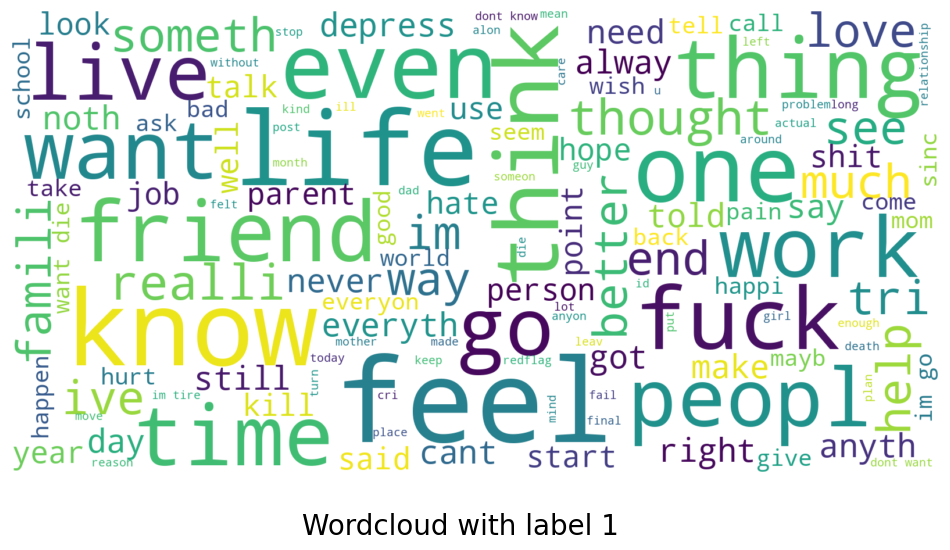

In [ ]:
show_wordcloud(df[df['label'] == 1]['text'], title = 'Wordcloud with label 1')

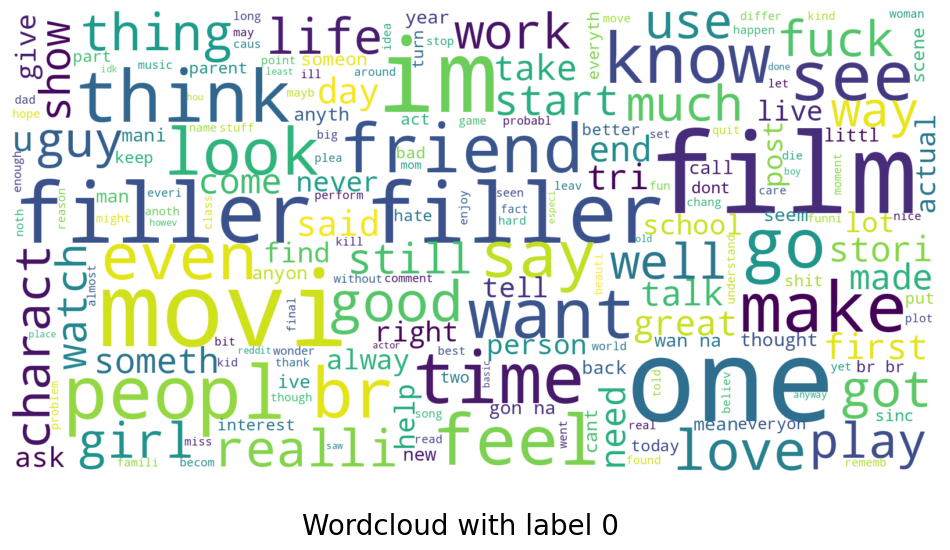

In [ ]:
show_wordcloud(df[df['label'] == 0]['text'], title = 'Wordcloud with label 0')

In [ ]:
from collections import Counter #lbary that counts the occurrences

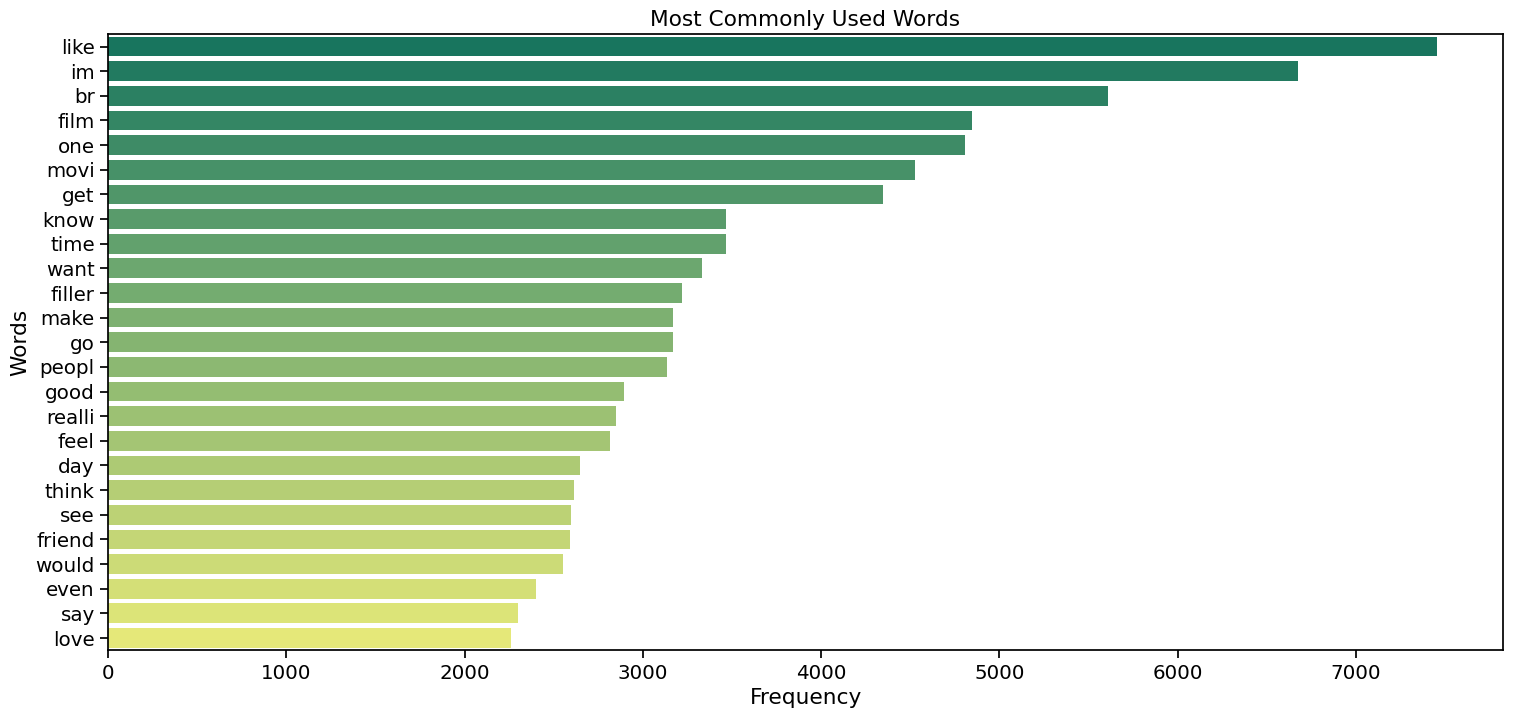

In [ ]:
all_spam_words = []
for sentence in df[df['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df1 = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

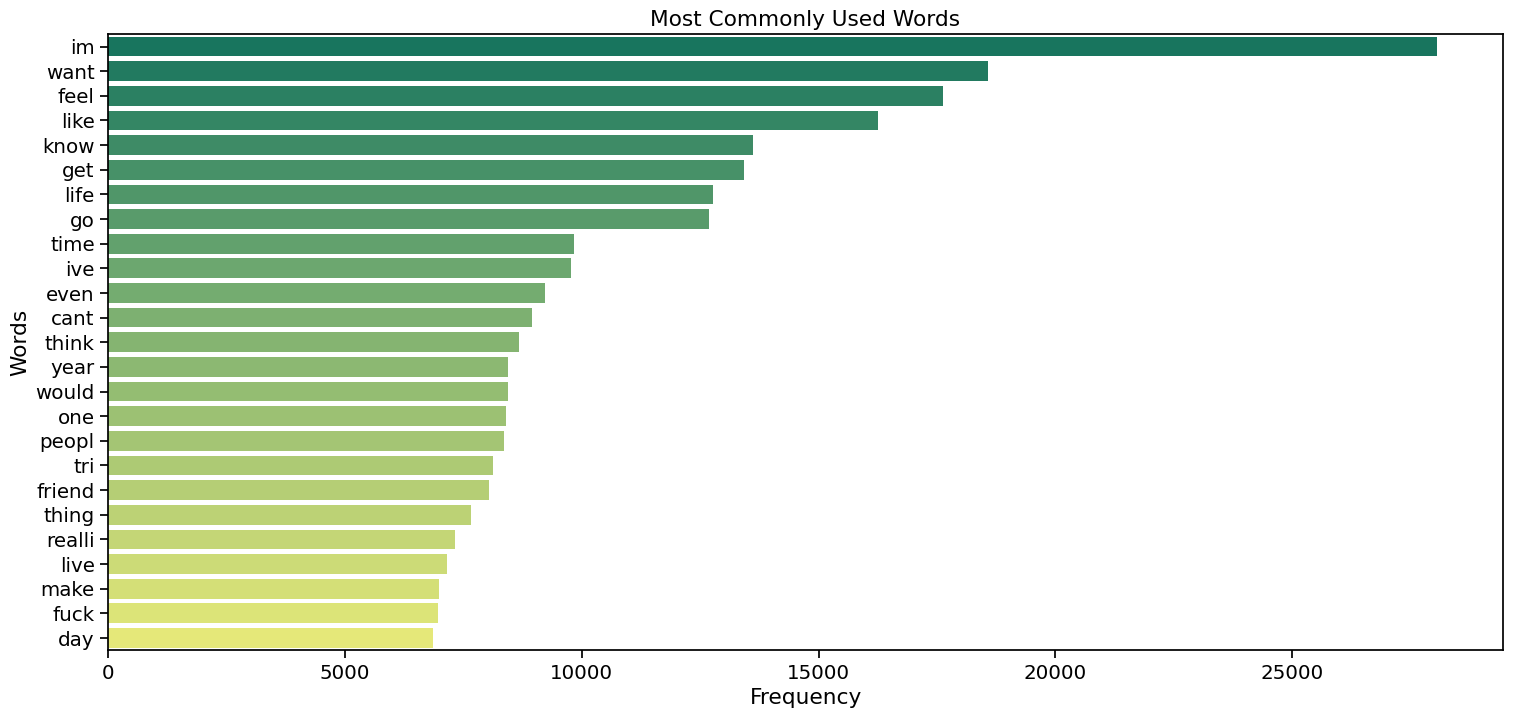

In [ ]:
all_spam_words = []
for sentence in df[df['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_spam_words.append(word)

df2 = pd.DataFrame(Counter(all_spam_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df2['Word'], x= df2['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df["text"]
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, svm

from sklearn.metrics import accuracy_score, roc_auc_score,  precision_score, recall_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
import time
from keras.layers import Dense, Input, Flatten, LSTM, Bidirectional,Embedding, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential, load_model
from keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from keras.utils import pad_sequences
from keras.utils import plot_model
from keras.callbacks import EarlyStopping

In [ ]:
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print('Model accuracy:', accuracy_score(y_test, y_pred))

Model accuracy: 0.9136729222520107


In [ ]:
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)

In [ ]:
print(f'Precision Score of the model: {precision}')
print(f'Recall Score of the model: {recall}')

Precision Score of the model: 0.921
Recall Score of the model: 0.903


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[2613,  214],
       [ 269, 2499]])

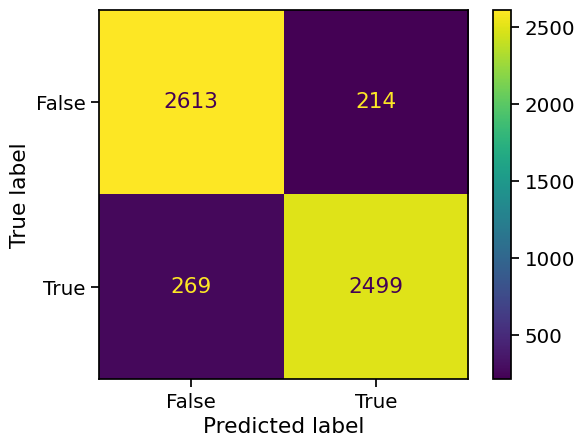

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
y_prob = lr.predict_proba(X_test)

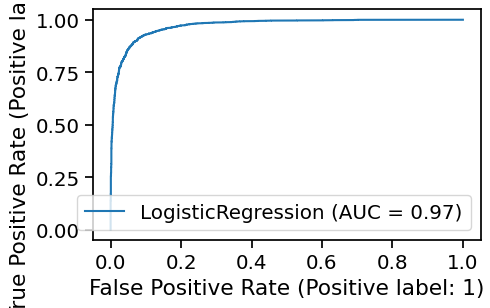

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(5, 3))
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      2827
           1       0.92      0.90      0.91      2768

    accuracy                           0.91      5595
   macro avg       0.91      0.91      0.91      5595
weighted avg       0.91      0.91      0.91      5595



In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9172475424486148
Precision: 0.9235575156192576
Recall: 0.9078757225433526
F1 Score: 0.9156494807797413


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[2619,  208],
       [ 255, 2513]])

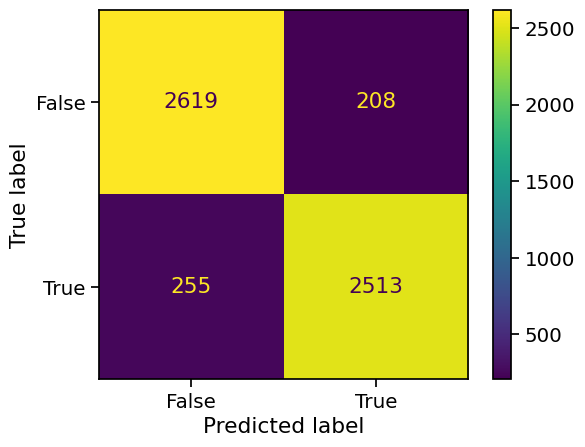

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

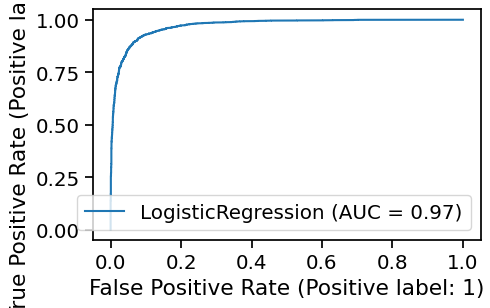

In [ ]:
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(5, 3))
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2827
           1       0.92      0.91      0.92      2768

    accuracy                           0.92      5595
   macro avg       0.92      0.92      0.92      5595
weighted avg       0.92      0.92      0.92      5595



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8250223413762288


In [ ]:
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)

In [ ]:
print(f'Precision Score of the model: {precision}')
print(f'Recall Score of the model: {recall}')

Precision Score of the model: 0.826
Recall Score of the model: 0.819


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[2350,  477],
       [ 502, 2266]])

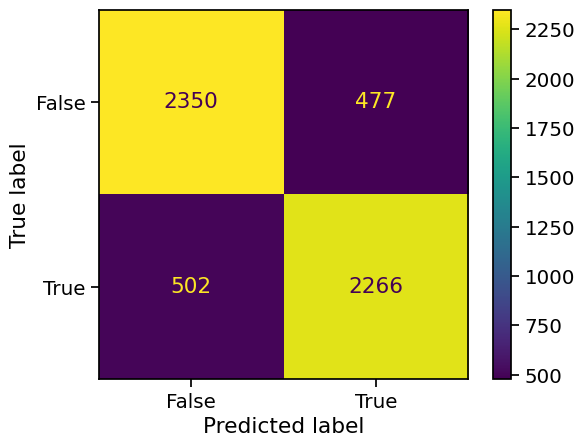

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
y_prob = dt.predict_proba(X_test)

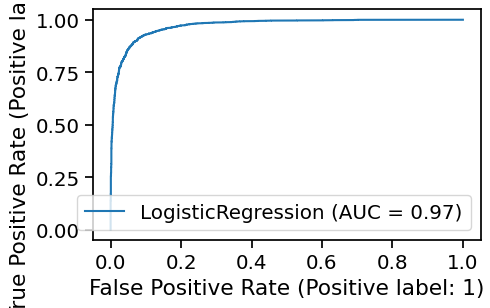

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      2827
           1       0.83      0.82      0.82      2768

    accuracy                           0.83      5595
   macro avg       0.83      0.82      0.82      5595
weighted avg       0.83      0.83      0.83      5595



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8911528150134048
Precision: 0.8823946156571024
Recall: 0.8999277456647399
F1 Score: 0.8910749418708639


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[2495  332]
 [ 277 2491]]


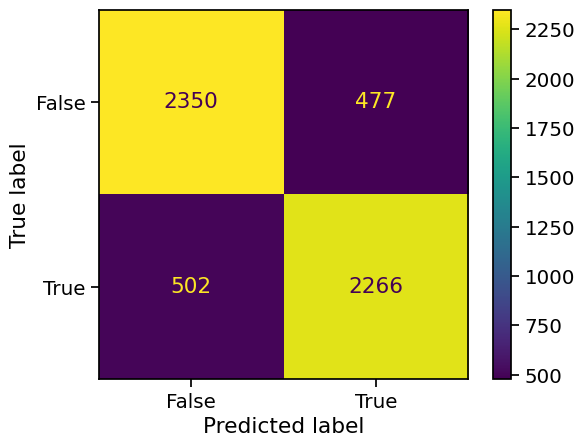

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
y_prob = rfc.predict_proba(X_test)

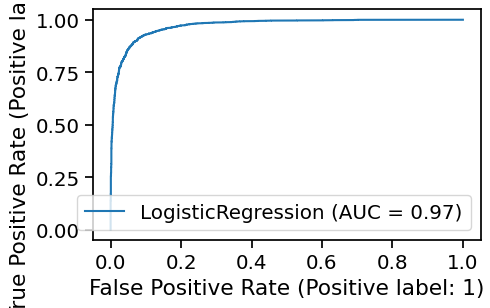

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax)
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      2827
           1       0.88      0.90      0.89      2768

    accuracy                           0.89      5595
   macro avg       0.89      0.89      0.89      5595
weighted avg       0.89      0.89      0.89      5595



In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = mnb.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8895442359249329
Precision: 0.8419211195928753
Recall: 0.9562861271676301
F1 Score: 0.895466847090663


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[2330  497]
 [ 121 2647]]


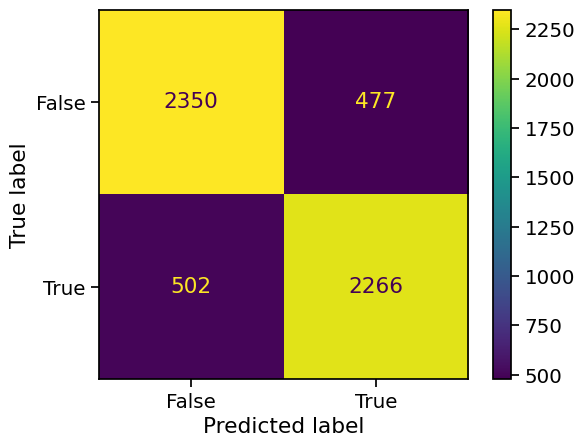

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
y_prob = mnb.predict_proba(X_test)

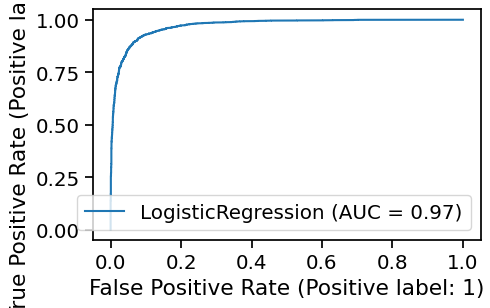

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))
RocCurveDisplay.from_estimator(lr, X_test, y_test, ax=ax)
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88      2827
           1       0.84      0.96      0.90      2768

    accuracy                           0.89      5595
   macro avg       0.90      0.89      0.89      5595
weighted avg       0.90      0.89      0.89      5595



In [ ]:
max_words = 5000
max_len = 100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['text'][0],'\n')
X, tokenizer = tokenize_pad_sequences(df['text'])
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 dear american teen question dutch person heard guy get way easier thing learn age u sooooo thth grader like right guy learn math 

After Tokenization & Padding 
 [1891  717  803  290 4128   68  557  108    5   37  768   21  340  346
  119    2   71  108  340 1026    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
y = df.label
X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=0.3, random_state=42, stratify=y_trn)

print('Train:         ', X_trn.shape, y_trn.shape)
print('Validation Set:', X_vld.shape, y_vld.shape)
print('Test Set:      ', X_tst.shape, y_tst.shape)

Train:          (15663, 100) (15663,)
Validation Set: (6714, 100) (6714,)
Test Set:       (5595, 100) (5595,)


In [ ]:
vocab_size = 5000
embedding_size = 32
epochs=50

model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=[tf.keras.metrics.Recall(),'accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 50, 32)           0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 50, 64)           16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                        

In [ ]:
es = EarlyStopping(monitor = 'val_loss', patience=5)#if validation loss is not imp roving keep patience of 5 steps
batch_size = 64

history = model.fit(X_trn, y_trn,
                    validation_data=(X_vld, y_vld),
                    batch_size=batch_size, epochs=epochs, verbose=1,
                    callbacks = [es])

Epoch 1/50
245/245 [==============================] - 54s 172ms/step - loss: 0.3372 - recall: 0.8393 - accuracy: 0.8522 - val_loss: 0.2090 - val_recall: 0.9139 - val_accuracy: 0.9182
Epoch 2/50
245/245 [==============================] - 39s 159ms/step - loss: 0.1842 - recall: 0.9324 - accuracy: 0.9314 - val_loss: 0.2023 - val_recall: 0.8979 - val_accuracy: 0.9182
Epoch 3/50
245/245 [==============================] - 45s 184ms/step - loss: 0.1451 - recall: 0.9548 - accuracy: 0.9501 - val_loss: 0.2224 - val_recall: 0.9298 - val_accuracy: 0.9181
Epoch 4/50
245/245 [==============================] - 38s 156ms/step - loss: 0.1174 - recall: 0.9653 - accuracy: 0.9605 - val_loss: 0.2573 - val_recall: 0.9091 - val_accuracy: 0.9102
Epoch 5/50
245/245 [==============================] - 40s 164ms/step - loss: 0.0948 - recall: 0.9750 - accuracy: 0.9711 - val_loss: 0.2851 - val_recall: 0.9289 - val_accuracy: 0.9042
Epoch 6/50
245/245 [==============================] - 40s 162ms/step - loss: 0.0784 -

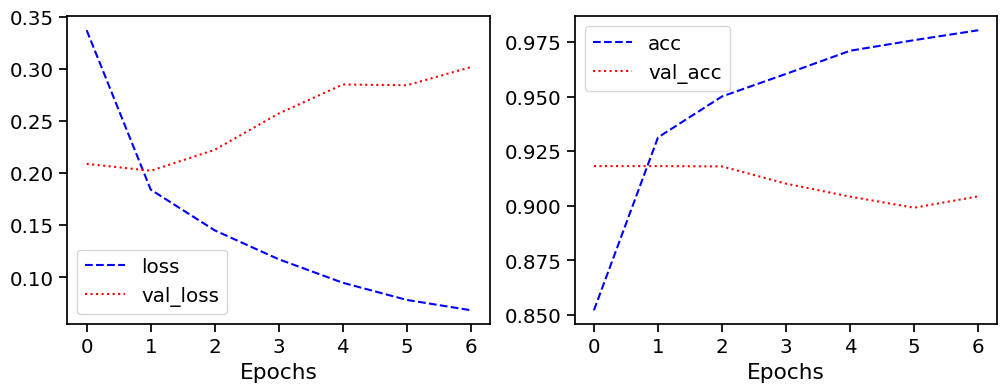

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label = 'acc')
plt.plot(history.history['val_accuracy'], 'r:', label = 'val_acc')
plt.xlabel('Epochs')
plt.legend()

plt.show()

In [ ]:
loss, accuracy,recall= model.evaluate(X_tst, y_tst, verbose=0)

# Print metrics
print('Loss  :', loss)
print('Accuracy  : {:.4f}'.format(accuracy))
print('Recall  : {:.4f}'.format(recall))

Loss  : 0.3228681981563568
Accuracy  : 0.9241
Recall  : 0.9021
